# Orthogonality and Orthonormal Bases in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: Orthogonality refers to vectors being perpendicular, with a zero dot product. An orthonormal basis is a set of vectors that are pairwise orthogonal, normalized (unit length), and span a vector space. These concepts are crucial in AI/ML for simplifying computations and reducing redundancy in data representations.

**Mathematical Definition**:
- Two vectors $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$ are **orthogonal** if:
  $$
  \mathbf{u} \cdot \mathbf{v} = \sum_{i=1}^n u_i v_i = 0
  $$
- A vector is **normalized** if its Euclidean norm is 1:
  $$
  \|\mathbf{u}\| = \sqrt{\mathbf{u} \cdot \mathbf{u}} = 1
  $$
- A set $\{\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n\}$ is an **orthonormal basis** for a vector space $V$ if:
  - Pairwise orthogonal: $\mathbf{v}_i \cdot \mathbf{v}_j = 0$ for $i \neq j$.
  - Normalized: $\|\mathbf{v}_i\| = 1$.
  - Spans $V$ and is linearly independent.

**Examples**:
- In $\mathbb{R}^2$, $\{[1, 0], [0, 1]\}$ is an orthonormal basis.
- In ML, eigenvectors of a covariance matrix in PCA are orthonormal, forming a basis for the principal component subspace.

**Relevance in Mathematics**:
- **Simplified Computations**: Orthogonal vectors eliminate cross-terms in dot products.
- **Efficient Representations**: Orthonormal bases provide non-redundant vector representations.
- **Numerical Stability**: Orthogonal matrices preserve norms, reducing computational errors.
- **Decomposition**: Facilitate algorithms like QR factorization or SVD.

**Relevance in AI/ML**:
- **Reduce Redundancy**: Ensure uncorrelated features, improving model interpretability.
- **Simplify Computations**: Enable efficient matrix operations in PCA, SVD, etc.
- **Stabilize Algorithms**: Orthogonal transformations maintain numerical stability.
- **Support Data Analysis**: Provide frameworks for variance analysis or clustering.

**Applications Overview**:
- **PCA**: Use orthonormal eigenvectors for dimensionality reduction.
- **SVD**: Leverage orthonormal bases for matrix factorization.
- **Spectral Clustering**: Use orthonormal eigenvectors for clustering.
- **Neural Networks**: Orthogonal initialization stabilizes training.
- **Feature Engineering**: Orthogonalize features to remove correlation.
- **Computer Vision**: Apply orthogonal transformations for image processing.

## Core Concepts and Derivations
This section covers orthogonality, normalization, orthonormal bases, and the Gram-Schmidt process, with examples, derivations, and visualizations.

### 2.1 Orthogonality
**Definition**: A set of vectors is orthogonal if every pair of distinct vectors has a dot product of zero. Orthogonal vectors are linearly independent.

**Explanation**: Orthogonality implies geometric perpendicularity, ensuring vectors are independent directions, reducing redundancy. For a set $\{\mathbf{v}_1, \mathbf{v}_2, \dots\}$, if $\mathbf{v}_i \cdot \mathbf{v}_j = 0$ for $i \neq j$, no vector lies in the span of others.

**Why Necessary**:
- **Simplified Computations**: Zero dot products eliminate cross-terms in projections or expansions.
- **Independent Features**: Ensure uncorrelated directions in ML, critical for PCA or clustering.
- **Numerical Efficiency**: Reduce complexity in matrix operations.
- **Data Interpretability**: Orthogonal features are easier to interpret in models.

**Example**: In $\mathbb{R}^2$, $[1, 0]$ and $[0, 1]$ are orthogonal since $[1, 0] \cdot [0, 1] = 0$.

**ML Use-Case**: In PCA, orthogonal eigenvectors of the covariance matrix represent uncorrelated principal components.

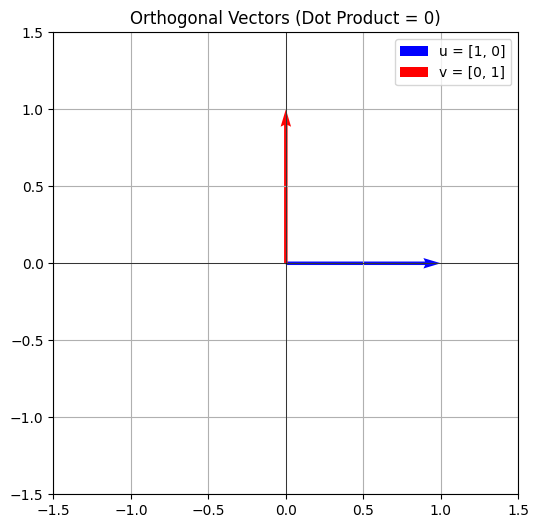

Dot product (u, v): 0


In [1]:
# Orthogonality Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define orthogonal vectors
u = np.array([1, 0])
v = np.array([0, 1])

# Compute dot product
dot_product = np.dot(u, v)

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='blue', label='u = [1, 0]')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red', label='v = [0, 1]')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f'Orthogonal Vectors (Dot Product = {dot_product})')
plt.legend()
plt.show()

print("Dot product (u, v):", dot_product)

### 2.2 Normalization
**Definition**: A vector $\mathbf{u}$ is normalized by dividing it by its norm: $\mathbf{u}_{\text{norm}} = \frac{\mathbf{u}}{\|\mathbf{u}\|}$, where $\|\mathbf{u}\| = \sqrt{\mathbf{u} \cdot \mathbf{u}}$.

**Explanation**: Normalization ensures vectors have unit length, standardizing their scale. This is critical for orthonormal bases and consistent computations in ML.

**Why Necessary**:
- **Consistent Scale**: Normalizes features or parameters, improving algorithm performance.
- **Orthonormal Bases**: Unit length is required for orthonormal bases in PCA or SVD.
- **Numerical Stability**: Prevents large magnitudes from causing computational issues.
- **Interpretability**: Ensures fair comparisons in algorithms like KNN or SVM.

**Example**: For $\mathbf{u} = [3, 4]$, $\|\mathbf{u}\| = 5$, so $\mathbf{u}_{\text{norm}} = [0.6, 0.8]$.

**ML Use-Case**: Normalizing feature vectors in KNN ensures distance metrics are scale-invariant.

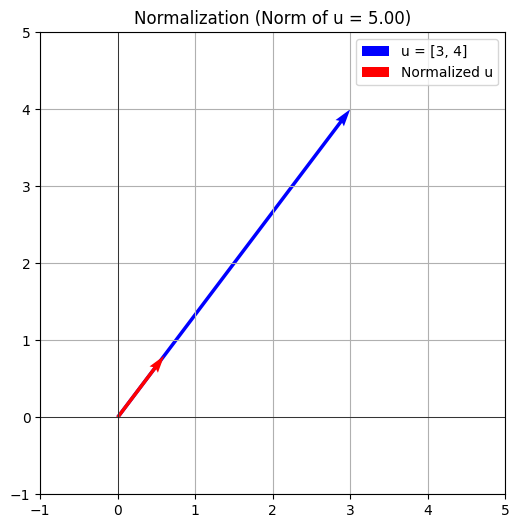

Original u: [3 4]
Norm of u: 5.0
Normalized u: [0.6 0.8]
Norm of normalized u: 1.0


In [2]:
# Normalization Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define vector
u = np.array([3, 4])
norm_u = np.linalg.norm(u)
u_norm = u / norm_u

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='blue', label='u = [3, 4]')
plt.quiver(0, 0, u_norm[0], u_norm[1], angles='xy', scale_units='xy', scale=1, color='red', label='Normalized u')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f'Normalization (Norm of u = {norm_u:.2f})')
plt.legend()
plt.show()

print("Original u:", u)
print("Norm of u:", norm_u)
print("Normalized u:", u_norm)
print("Norm of normalized u:", np.linalg.norm(u_norm))

### 2.3 Orthonormal Bases
**Definition**: An orthonormal basis is a set of vectors that are orthogonal, normalized, and span the vector space. For $\mathbb{R}^n$, it has $n$ vectors, and its matrix $\mathbf{Q}$ satisfies $\mathbf{Q}^T \mathbf{Q} = \mathbf{I}$.

**Explanation**: Orthonormal bases simplify matrix operations, as their inverse is their transpose, and they provide a non-redundant representation of the space.

**Why Necessary**:
- **Efficient Representation**: Non-redundant basis for data or transformations.
- **Simplified Computations**: Orthogonal matrices simplify decompositions like PCA or SVD.
- **Numerical Stability**: Preserve norms, reducing errors in high-dimensional computations.
- **ML Applications**: Form the basis for principal components or singular vectors.

**Example**: $\{[1, 0], [0, 1]\}$ is an orthonormal basis for $\mathbb{R}^2$.

**ML Use-Case**: In PCA, the orthonormal basis of eigenvectors defines the principal component subspace.

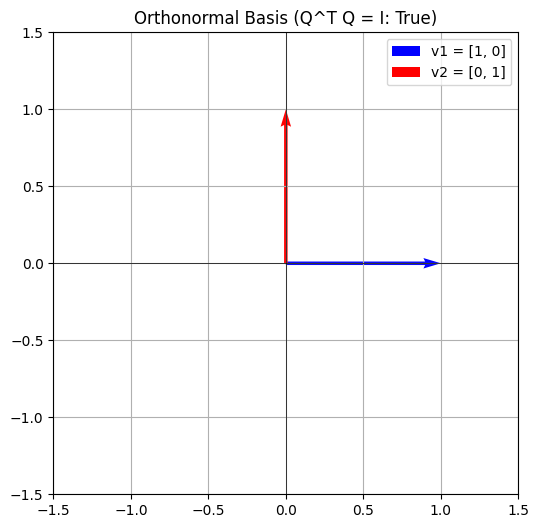

Q:
 [[1 0]
 [0 1]]
Q^T Q:
 [[1 0]
 [0 1]]
Is Q orthonormal?: True


In [3]:
# Orthonormal Basis Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define orthonormal basis
Q = np.array([[1, 0], [0, 1]]).T  # Standard basis for R^2

# Verify orthonormality
is_orthonormal = np.allclose(np.dot(Q.T, Q), np.eye(2))

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, Q[0, 0], Q[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 = [1, 0]')
plt.quiver(0, 0, Q[0, 1], Q[1, 1], angles='xy', scale_units='xy', scale=1, color='red', label='v2 = [0, 1]')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f'Orthonormal Basis (Q^T Q = I: {is_orthonormal})')
plt.legend()
plt.show()

print("Q:\n", Q)
print("Q^T Q:\n", np.dot(Q.T, Q))
print("Is Q orthonormal?:", is_orthonormal)

### 2.4 Gram-Schmidt Orthogonalization
**Definition**: The Gram-Schmidt process transforms a set of linearly independent vectors into an orthonormal basis by iteratively orthogonalizing and normalizing vectors.

**Explanation**: For vectors $\{\mathbf{v}_1, \mathbf{v}_2, \dots\}$:
- Set $\mathbf{u}_1 = \frac{\mathbf{v}_1}{\|\mathbf{v}_1\|}$.
- For $i \geq 2$, subtract projections: $\mathbf{u}_i' = \mathbf{v}_i - \sum_{j=1}^{i-1} \text{proj}_{\mathbf{u}_j}(\mathbf{v}_i)$, then normalize $\mathbf{u}_i = \frac{\mathbf{u}_i'}{\|\mathbf{u}_i'\|}$.

**Why Necessary**:
- **Basis Conversion**: Creates orthonormal bases for efficient computations.
- **Numerical Stability**: Used in QR factorization for stable matrix decompositions.
- **Feature Orthogonalization**: Removes correlation in features for ML models.
- **Algorithm Support**: Enables algorithms like PCA or SVD requiring orthonormal bases.

**Example**: For $\{[1, 1], [1, 0]\}$, Gram-Schmidt produces an orthonormal basis.

**ML Use-Case**: Orthogonalizing features in regression to prevent multicollinearity.

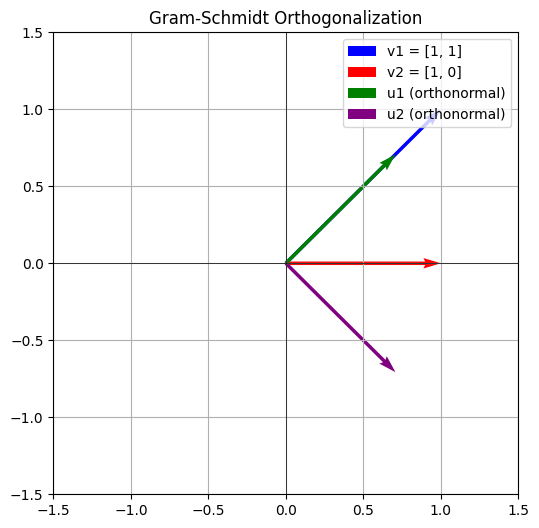

Original vectors V:
 [[1. 1.]
 [1. 0.]]
Orthonormal basis U:
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
U^T U (should be I):
 [[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]


In [4]:
# Gram-Schmidt Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define Gram-Schmidt process
def gram_schmidt(V):
    U = np.copy(V).astype(float)
    for i in range(V.shape[1]):
        for j in range(i):
            U[:, i] -= np.dot(U[:, j], V[:, i]) / np.dot(U[:, j], U[:, j]) * U[:, j]
        U[:, i] /= np.linalg.norm(U[:, i])
    return U

# Define vectors
V = np.array([[1, 1], [1, 0]], dtype=float).T
U = gram_schmidt(V)

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, V[0, 0], V[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 = [1, 1]')
plt.quiver(0, 0, V[0, 1], V[1, 1], angles='xy', scale_units='xy', scale=1, color='red', label='v2 = [1, 0]')
plt.quiver(0, 0, U[0, 0], U[1, 0], angles='xy', scale_units='xy', scale=1, color='green', label='u1 (orthonormal)')
plt.quiver(0, 0, U[0, 1], U[1, 1], angles='xy', scale_units='xy', scale=1, color='purple', label='u2 (orthonormal)')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Gram-Schmidt Orthogonalization')
plt.legend()
plt.show()

print("Original vectors V:\n", V)
print("Orthonormal basis U:\n", U)
print("U^T U (should be I):\n", np.dot(U.T, U))

## Applications in AI/ML
Orthogonality and orthonormal bases are applied in various ML tasks:
- **PCA**: Use orthonormal eigenvectors for dimensionality reduction.
- **SVD**: Leverage orthonormal bases for matrix factorization.
- **Spectral Clustering**: Use orthonormal eigenvectors for clustering.
- **Neural Networks**: Orthogonal initialization stabilizes training.
- **Feature Engineering**: Orthogonalize features to remove correlation.
- **Computer Vision**: Apply orthogonal transformations for image processing.

## Practical ML Examples
Below are coded examples demonstrating orthogonality and orthonormal bases in ML contexts.

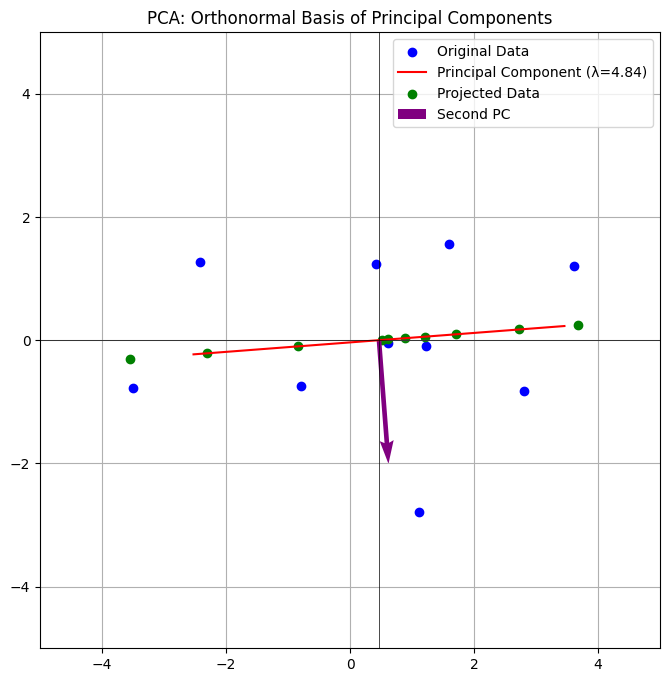

Eigenvalues:
 [1.83220741 4.83706315]
Orthonormal Eigenvectors:
 [[ 0.07663596 -0.99705914]
 [-0.99705914 -0.07663596]]
Projected Data:
 [ 1.31490693  2.78000245 -0.14839642  4.02322859 -0.04746817 -0.7501718
 -0.42888268 -3.22705543 -1.24659181 -2.26957166]


In [5]:
# Example 1: PCA (Orthonormal Basis for Dimensionality Reduction)
import numpy as np
import matplotlib.pyplot as plt

# Simulate data: 10 samples, 2 features
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[4, 1], [1, 3]], 10)

# Center the data
mean = np.mean(data, axis=0)
centered_data = data - mean

# Compute covariance matrix and eigendecomposition
cov_matrix = np.cov(centered_data.T)
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)  # Orthonormal eigenvectors

# Project onto first principal component
principal_component = eig_vecs[:, -1]  # Largest eigenvalue
projected_data = centered_data @ principal_component

# Visualize
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.plot([-3 * eig_vecs[0, -1] + mean[0], 3 * eig_vecs[0, -1] + mean[0]], 
         [-3 * eig_vecs[1, -1] + mean[1], 3 * eig_vecs[1, -1] + mean[1]], 
         'r-', label=f'Principal Component (λ={eig_vals[-1]:.2f})')
plt.scatter(projected_data * eig_vecs[0, -1] + mean[0], projected_data * eig_vecs[1, -1] + mean[1], 
            c='green', label='Projected Data')
plt.quiver(mean[0], mean[1], eig_vecs[0, 0], eig_vecs[1, 0], color='purple', scale=5, label='Second PC')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.axhline(mean[1], color='black', linewidth=0.5)
plt.axvline(mean[0], color='black', linewidth=0.5)
plt.title('PCA: Orthonormal Basis of Principal Components')
plt.legend()
plt.show()

print("Eigenvalues:\n", eig_vals)
print("Orthonormal Eigenvectors:\n", eig_vecs)
print("Projected Data:\n", projected_data)

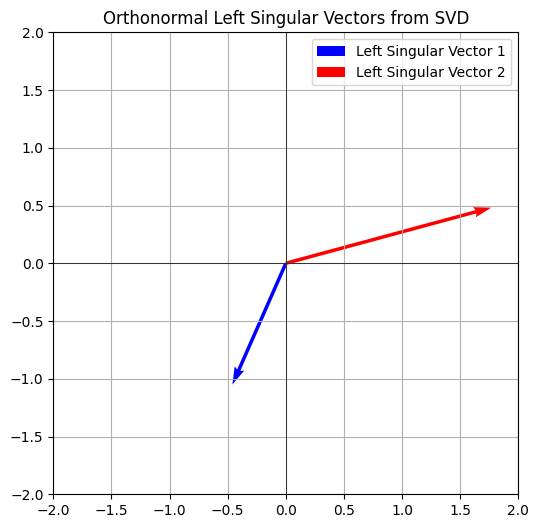

Left Singular Vectors (U):
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
Singular Values:
 [9.52551809 0.51430058]
Right Singular Vectors (V^T):
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]
U^T U (should be I):
 [[1.00000000e+00 1.22557499e-16 1.09138877e-16]
 [1.22557499e-16 1.00000000e+00 2.41849907e-17]
 [1.09138877e-16 2.41849907e-17 1.00000000e+00]]


In [6]:
# Example 2: SVD (Orthonormal Bases for Matrix Factorization)
import numpy as np
import matplotlib.pyplot as plt

# Define matrix
A = np.array([[1, 2], [3, 4], [5, 6]])

# Compute SVD
U, s, Vt = np.linalg.svd(A, full_matrices=True)

# Visualize left singular vectors (U)
plt.figure(figsize=(6, 6))
for i in range(2):
    u = U[:, i] * 2
    plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color=['blue', 'red'][i], 
               label=f'Left Singular Vector {i+1}')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Orthonormal Left Singular Vectors from SVD')
plt.legend()
plt.show()

print("Left Singular Vectors (U):\n", U)
print("Singular Values:\n", s)
print("Right Singular Vectors (V^T):\n", Vt)
print("U^T U (should be I):\n", np.dot(U.T, U))

## Summary
- **Key Concepts**: Orthogonality ensures zero dot products, normalization ensures unit length, and orthonormal bases combine both to span a space efficiently. Gram-Schmidt creates such bases.
- **Mathematical Significance**: Simplify computations, ensure stability, and support decompositions.
- **AI/ML Relevance**: Reduce redundancy, simplify matrix operations, and stabilize algorithms like PCA and SVD.
- **Next Steps**: Practice verifying orthogonality, normalizing vectors, and applying Gram-Schmidt in ML tasks.

## Tips and Practice
- **Visualize**: Use Matplotlib (as shown) or GeoGebra (https://www.geogebra.org/) to plot orthogonal vectors or orthonormal bases.
- **Practice Problems**:
  1. Verify if $\{[1, 1], [1, -1]\}$ is orthogonal and normalize it.
  2. Apply Gram-Schmidt to $\{[2, 1], [1, 2]\}$ to find an orthonormal basis.
  3. Check if the matrix $\begin{bmatrix} 0.707 & -0.707 \\ 0.707 & 0.707 \end{bmatrix}$ is orthogonal.
- **Project Idea**: Implement PCA on a dataset and visualize the orthonormal basis of principal components.
- **Resources**:
  - *Book*: “Linear Algebra and Its Applications” by Gilbert Strang.
  - *Online*: 3Blue1Brown’s “Essence of Linear Algebra” (YouTube, orthogonality video), Khan Academy’s Linear Algebra course.
  - *Practice*: MIT OpenCourseWare (18.06 Linear Algebra), NumPy tutorials on Real Python.

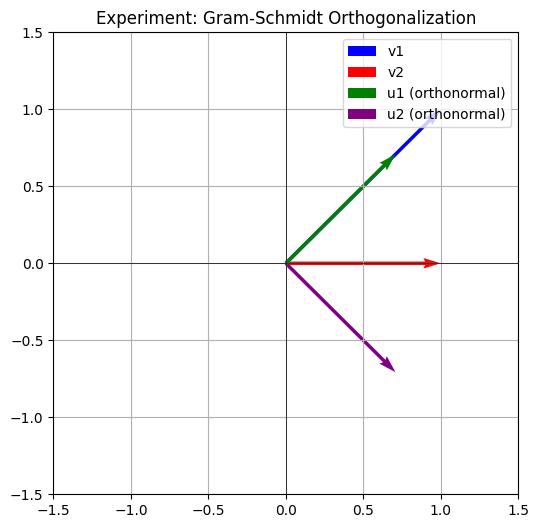

Original vectors V:
 [[1. 1.]
 [1. 0.]]
Orthonormal basis U:
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
U^T U (should be I):
 [[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]


In [7]:
# Experimentation Zone
# Try defining your own vectors and testing orthogonality or creating an orthonormal basis!
import numpy as np
import matplotlib.pyplot as plt

# Define vectors
V = np.array([[1, 1], [1, 0]], dtype=float).T

# Gram-Schmidt
def gram_schmidt(V):
    U = np.copy(V).astype(float)
    for i in range(V.shape[1]):
        for j in range(i):
            U[:, i] -= np.dot(U[:, j], V[:, i]) / np.dot(U[:, j], U[:, j]) * U[:, j]
        U[:, i] /= np.linalg.norm(U[:, i])
    return U

U = gram_schmidt(V)

# Visualize
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, V[0, 0], V[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
plt.quiver(0, 0, V[0, 1], V[1, 1], angles='xy', scale_units='xy', scale=1, color='red', label='v2')
plt.quiver(0, 0, U[0, 0], U[1, 0], angles='xy', scale_units='xy', scale=1, color='green', label='u1 (orthonormal)')
plt.quiver(0, 0, U[0, 1], U[1, 1], angles='xy', scale_units='xy', scale=1, color='purple', label='u2 (orthonormal)')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Experiment: Gram-Schmidt Orthogonalization')
plt.legend()
plt.show()

print("Original vectors V:\n", V)
print("Orthonormal basis U:\n", U)
print("U^T U (should be I):\n", np.dot(U.T, U))